In [1]:
from matplotlib.ticker import LinearLocator, MultipleLocator, AutoMinorLocator
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from adjustText import adjust_text
from astropy import units as u
import sys
import site
import matplotlib.pyplot as plt
from math import *
from tkinter import *
import astropy.units as u
import numpy as np
import pandas as pd
import plotly.express as px
import datetime
from scipy.stats import spearmanr
import seaborn as sns
import math

In [2]:
fits = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\fits_thesis.xlsx')
guess = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\thesis_guess.xlsx')


In [39]:
data = pd.concat([fits, guess], axis=1)
data = data.where((data.gamma1>data.gamma2))
print(data.columns)


Index(['Source.Name', 'Reduced chi sq', 'c1', 'c1_err', 'gamma1', 'gamma1_err',
       'gamma2', 'gamma2_err', 'break_point_mev', 'break_point_err_mev',
       'final_fit_type', 'exp_cutoff_point_mev', 'cutoff_err_mev', 'alpha',
       'year', 'month', 'day', 'time', 'fit', 'Source.Name', 'Date',
       'averaging', 'Direction', 'Data type', 'distance_au', 'STEP', 'EPT',
       'HET', 'Sigma', 'Relative error', 'Fraction of nan',
       'Leave first HET channel out', 'Shift STEP data', 'type_of_fit',
       'Fit to', 'Window', 'which_fit', 'gamma1_guess', 'gamma2_guess',
       'c1_guess', 'alpha_guess', 'break_guess_mev', 'cutoff_guess_mev',
       'Use random', 'Iterations', 'min_e_mev', 'max_e_mev'],
      dtype='object')


In [40]:
step_ept_het = data.where((data.type_of_fit == "step_ept_het"), np.nan)# & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.6859485403) , np.nan)
step_ept = data.where((data.type_of_fit == "step_ept") , np.nan)#& (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het = data.where((data.type_of_fit == "ept_het") & (data.Date >np.datetime64('2021-10-29')) , np.nan)
step = data.where((data.type_of_fit == "step" ) , np.nan)
ept = data.where((data.type_of_fit == "ept") , np.nan)


In [5]:
ept_het[90:]

,Source.Name,Reduced chi sq,c1,c1_err,gamma1,gamma1_err,gamma2,gamma2_err,break_point_mev,break_point_err_mev,...,gamma1_guess,gamma2_guess,c1_guess,alpha_guess,break_guess_mev,cutoff_guess_mev,Use random,Iterations,min_e_mev,max_e_mev
90,2021-11-01-0128-fit-result-variables_ept_het-p...,0.408005,52836.725141,2151.971096,-11.874588,12220.730732,-17.352408,12185.150155,0.226981,157.269147,...,-1.9,-2.5,1000.0,7.16,0.06,0.12,True,20.0,0.032951,10.623003
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,2021-11-09-1639-fit-result-variables_ept_het-p...,0.223301,1176.349006,82.333145,-1.945753,0.128438,-4.666474,4.791582,0.417334,0.000000,...,-1.9,-2.5,1000.0,7.16,0.06,0.12,True,20.0,0.040000,1.590048
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2021-12-04-1313-fit-result-variables_ept_het-p...,0.395813,2184.297444,154.172720,-3.068196,0.443597,-4.403685,0.175562,0.052459,0.000000,...,-1.9,-2.5,1000.0,7.16,0.06,0.12,True,20.0,0.032951,3.793309
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2021-12-05-1925-fit-result-variables_ept_het-p...,0.480677,907.147104,207.750776,-1.993705,0.310203,NaN,NaN,NaN,NaN,...,-1.9,-2.5,1000.0,7.16,0.06,0.12,True,20.0,0.032951,0.685949
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.count()

Source.Name                    115
Reduced chi sq                 115
c1                             115
c1_err                         115
gamma1                         115
gamma1_err                     115
gamma2                          90
gamma2_err                      90
break_point_mev                 90
break_point_err_mev             90
final_fit_type                 115
exp_cutoff_point_mev            16
cutoff_err_mev                  16
alpha                           90
year                           115
month                          115
day                            115
time                           115
fit                            115
Source.Name                    115
Date                           115
averaging                      115
Direction                      115
Data type                      115
distance_au                    115
STEP                           115
EPT                            115
HET                            115
Sigma               

In [41]:
n_step_ept_het = str(step_ept_het['break_point_mev'].count())
n_step_ept = str(step_ept['break_point_mev'].count())
n_ept_het = str(ept_het['break_point_mev'].count())
n_step = str(step['break_point_mev'].count())
n_ept = str(ept['break_point_mev'].count())

In [8]:
ept.count()

Source.Name                    38
Reduced chi sq                 38
c1                             38
c1_err                         38
gamma1                         38
gamma1_err                     38
gamma2                         21
gamma2_err                     21
break_point_mev                21
break_point_err_mev            21
final_fit_type                 38
exp_cutoff_point_mev            2
cutoff_err_mev                  2
alpha                          21
year                           38
month                          38
day                            38
time                           38
fit                            38
Source.Name                    38
Date                           38
averaging                      38
Direction                      38
Data type                      38
distance_au                    38
STEP                           38
EPT                            38
HET                            38
Sigma                          38
Relative error

In [9]:
x = np.arange(-20,10)
y = np.arange(-20,10)

C:\Users\Omistaja\Anaconda3\envs\annamaria\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Omistaja\Anaconda3\envs\annamaria\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


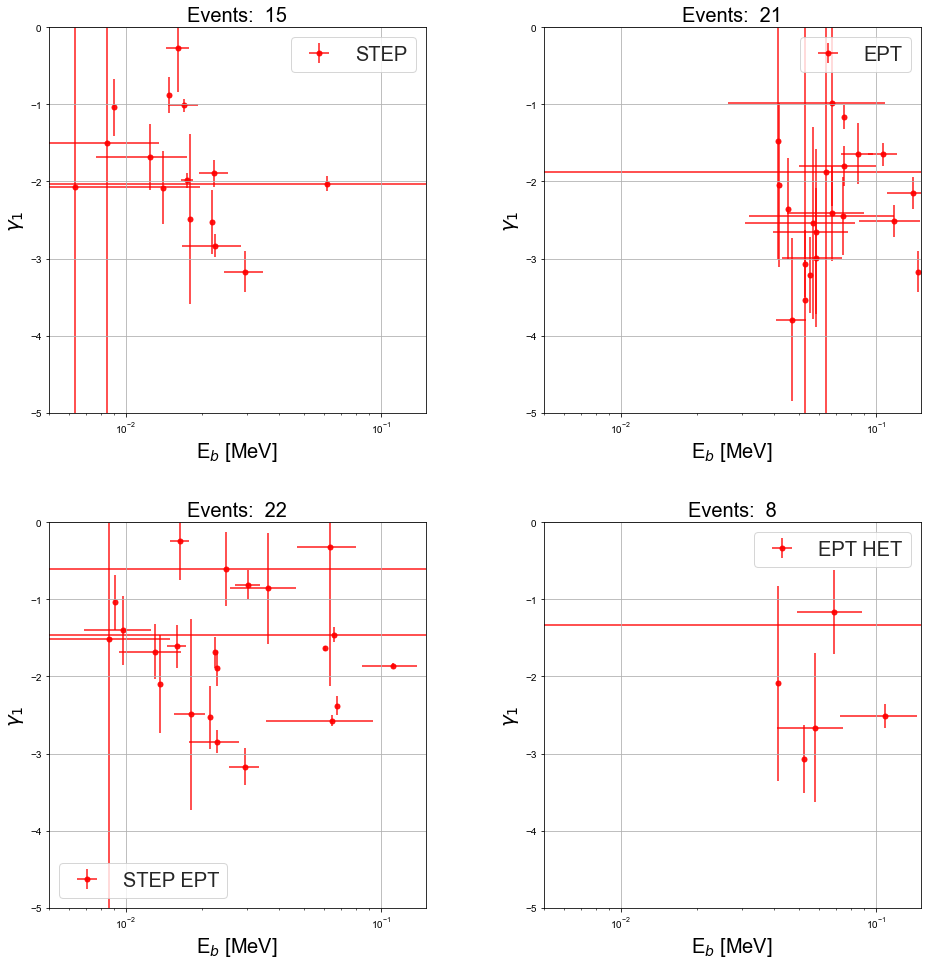

In [10]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
xmaxlim = 0.15
yminlim = -5

ax[0,0].errorbar(x=step['break_point_mev'], y=step['gamma1'], xerr=step['break_point_err_mev'], yerr=step['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[0,1].errorbar(x=ept['break_point_mev'], y=ept['gamma1'], xerr=ept['break_point_err_mev'], yerr=ept['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(x=step_ept['break_point_mev'], y=step_ept['gamma1'], xerr=step_ept['break_point_err_mev'], yerr=step_ept['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(x=ept_het['break_point_mev'], y=ept_het['gamma1'], xerr=ept_het['break_point_err_mev'], yerr=ept_het['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('Events:  '+ n_step, size = s)
ax[0,1].set_title('Events:  '+ n_ept, size = s)
ax[1,0].set_title('Events:  '+ n_step_ept, size = s)
ax[1,1].set_title('Events:  '+ n_ept_het, size = s)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_xlim(0.005,xmaxlim)
ax[0,0].set_ylim(yminlim, 0)
ax[0,0].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[0,0].set_ylabel(r'$\gamma_1$', size=s)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_xlim(0.005,xmaxlim)
ax[0,1].set_ylim(yminlim, 0)
ax[0,1].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[0,1].set_ylabel(r'$\gamma_1$', size=s)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_xlim(0.005,xmaxlim)
ax[1,0].set_ylim(yminlim, 0)
ax[1,0].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[1,0].set_ylabel(r'$\gamma_1$', size=s)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_xlim(0.005,xmaxlim)
ax[1,1].set_ylim(yminlim, 0)
ax[1,1].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[1,1].set_ylabel(r'$\gamma_1$', size=s)


ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')

#plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

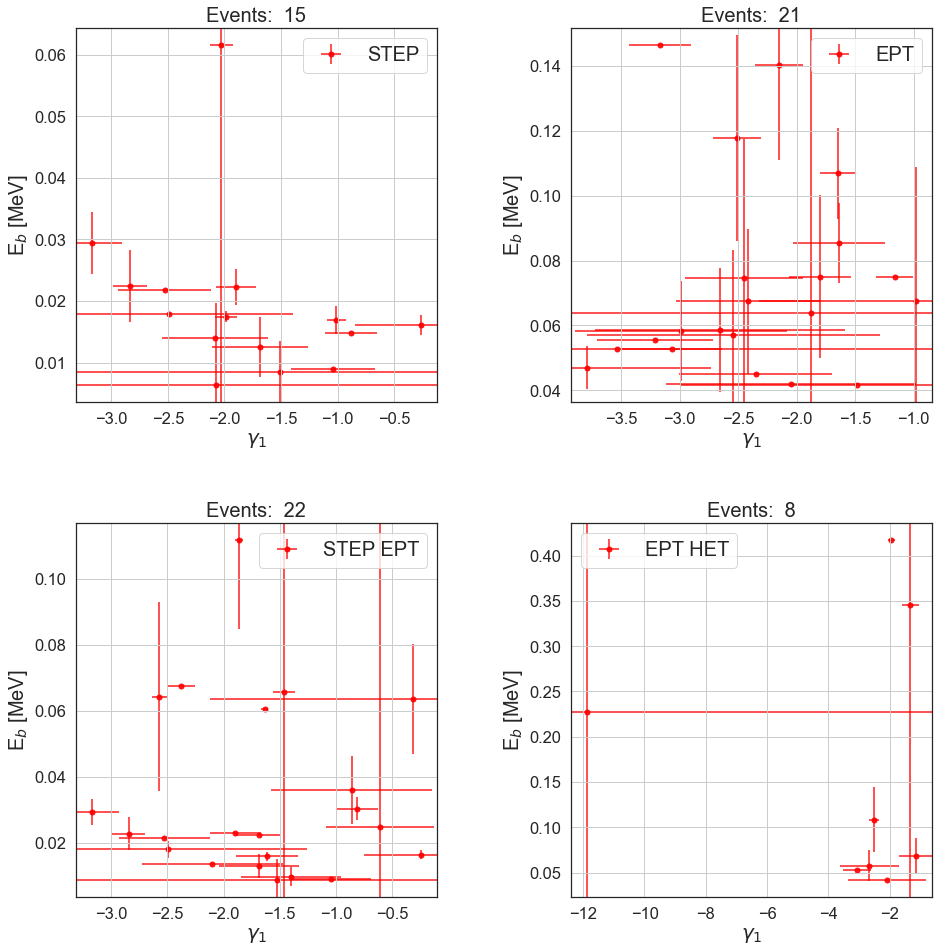

In [11]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
xmaxlim = 0.75
yminlim = -13

ax[0,0].errorbar(x=step['gamma1'] , y=step['break_point_mev'], xerr=step['gamma1_err'], yerr=step['break_point_err_mev'],  color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[0,1].errorbar(x=ept['gamma1'], y=ept['break_point_mev'],xerr=ept['gamma1_err'],  yerr=ept['break_point_err_mev'],  color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(x=step_ept['gamma1'], y=step_ept['break_point_mev'], xerr=step_ept['gamma1_err'], yerr=step_ept['break_point_err_mev'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(x=ept_het['gamma1'], y=ept_het['break_point_mev'], xerr=ept_het['gamma1_err'], yerr=ept_het['break_point_err_mev'],  color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('Events:  '+ n_step, size = s)
ax[0,1].set_title('Events:  '+ n_ept, size = s)
ax[1,0].set_title('Events:  '+ n_step_ept, size = s)
ax[1,1].set_title('Events:  '+ n_ept_het, size = s)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
#ax[0,0].set_xlim(0,xmaxlim)
#ax[0,0].set_ylim(yminlim, 0)
ax[0,0].set_ylabel(r'E$_b$ [MeV]', size=s)
ax[0,0].set_xlabel(r'$\gamma_1$', size=s)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
#ax[0,1].set_xlim(0,xmaxlim)
#ax[0,1].set_ylim(yminlim, 0)
ax[0,1].set_ylabel(r'E$_b$ [MeV]', size=s)
ax[0,1].set_xlabel(r'$\gamma_1$', size=s)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
#ax[1,0].set_xlim(0,xmaxlim)
#ax[1,0].set_ylim(yminlim, 0)
ax[1,0].set_ylabel(r'E$_b$ [MeV]', size=s)
ax[1,0].set_xlabel(r'$\gamma_1$', size=s)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
#ax[1,1].set_xlim(0,xmaxlim)
#ax[1,1].set_ylim(yminlim, 0)
ax[1,1].set_ylabel(r'E$_b$ [MeV]', size=s)
ax[1,1].set_xlabel(r'$\gamma_1$', size=s)



#plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

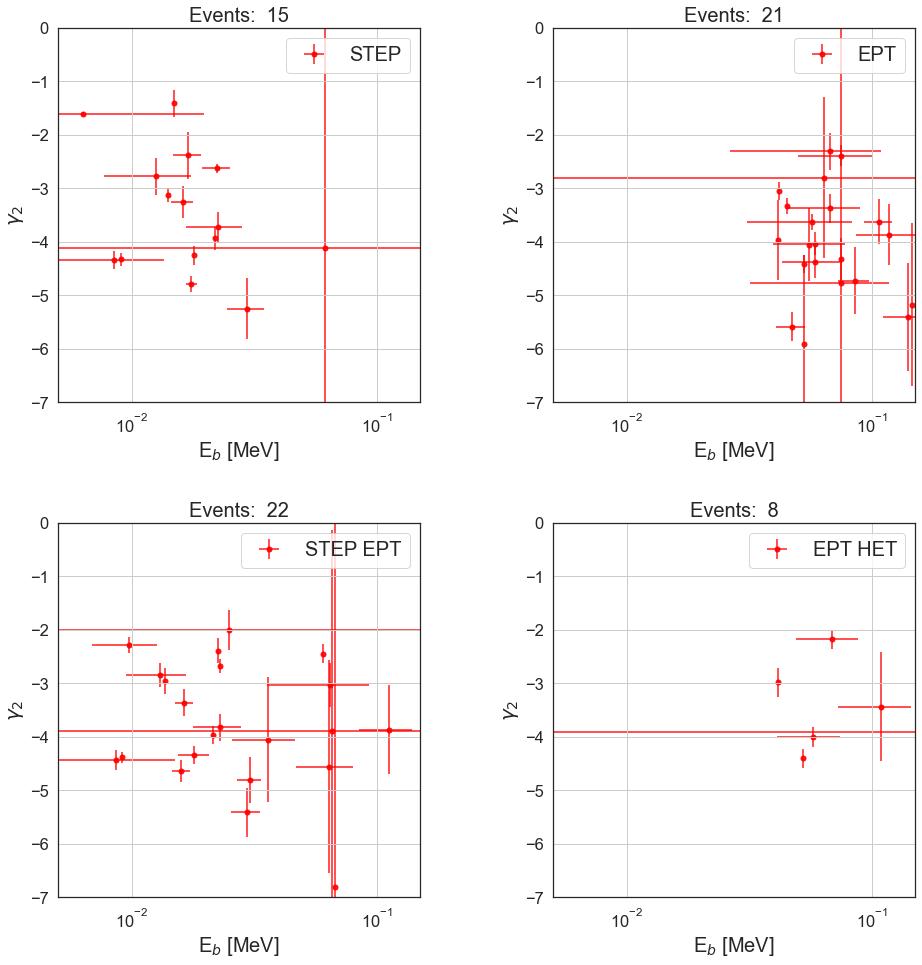

In [12]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
xmaxlim = 0.15
yminlim = -7

ax[0,0].errorbar(x=step['break_point_mev'], y=step['gamma2'], xerr=step['break_point_err_mev'], yerr=step['gamma2_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[0,1].errorbar(x=ept['break_point_mev'], y=ept['gamma2'], xerr=ept['break_point_err_mev'], yerr=ept['gamma2_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(x=step_ept['break_point_mev'], y=step_ept['gamma2'], xerr=step_ept['break_point_err_mev'], yerr=step_ept['gamma2_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(x=ept_het['break_point_mev'], y=ept_het['gamma2'], xerr=ept_het['break_point_err_mev'], yerr=ept_het['gamma2_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('Events:  '+ n_step, size = s)
ax[0,1].set_title('Events:  '+ n_ept, size = s)
ax[1,0].set_title('Events:  '+ n_step_ept, size = s)
ax[1,1].set_title('Events:  '+ n_ept_het, size = s)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_xlim(0.005,xmaxlim)
ax[0,0].set_ylim(yminlim, 0)
ax[0,0].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[0,0].set_ylabel(r'$\gamma_2$', size=s)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_xlim(0.005,xmaxlim)
ax[0,1].set_ylim(yminlim, 0)
ax[0,1].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[0,1].set_ylabel(r'$\gamma_2$', size=s)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_xlim(0.005,xmaxlim)
ax[1,0].set_ylim(yminlim, 0)
ax[1,0].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[1,0].set_ylabel(r'$\gamma_2$', size=s)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_xlim(0.005,xmaxlim)
ax[1,1].set_ylim(yminlim, 0)
ax[1,1].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[1,1].set_ylabel(r'$\gamma_2$', size=s)

ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')

#plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

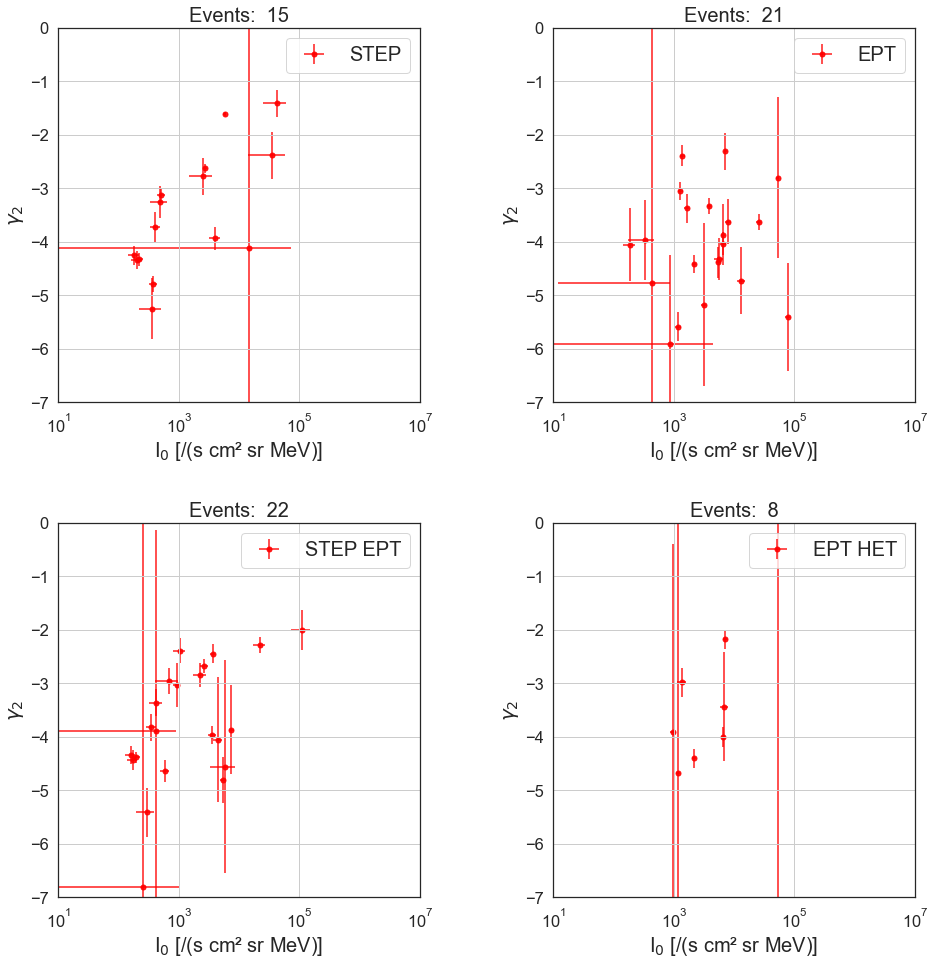

In [13]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
minv = 10

xmaxlim = 10000000
yminlim = -7

ax[0,0].errorbar(x=step['c1'], y=step['gamma2'], xerr=step['c1_err'], yerr=step['gamma2_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[0,1].errorbar(x=ept['c1'], y=ept['gamma2'], xerr=ept['c1_err'], yerr=ept['gamma2_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(x=step_ept['c1'], y=step_ept['gamma2'], xerr=step_ept['c1_err'], yerr=step_ept['gamma2_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(x=ept_het['c1'], y=ept_het['gamma2'], xerr=ept_het['c1_err'], yerr=ept_het['gamma2_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('Events:  '+ n_step, size = s)
ax[0,1].set_title('Events:  '+ n_ept, size = s)
ax[1,0].set_title('Events:  '+ n_step_ept, size = s)
ax[1,1].set_title('Events:  '+ n_ept_het, size = s)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_xlim(minv,xmaxlim)
ax[0,0].set_ylim(yminlim, 0)
ax[0,0].set_xlabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[0,0].set_ylabel(r'$\gamma_2$', size=s)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_xlim(minv,xmaxlim)
ax[0,1].set_ylim(yminlim, 0)
ax[0,1].set_xlabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[0,1].set_ylabel(r'$\gamma_2$', size=s)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_xlim(minv,xmaxlim)
ax[1,0].set_ylim(yminlim, 0)
ax[1,0].set_xlabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[1,0].set_ylabel(r'$\gamma_2$', size=s)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_xlim(minv,xmaxlim)
ax[1,1].set_ylim(yminlim, 0)
ax[1,1].set_xlabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[1,1].set_ylabel(r'$\gamma_2$', size=s)

ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')


plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

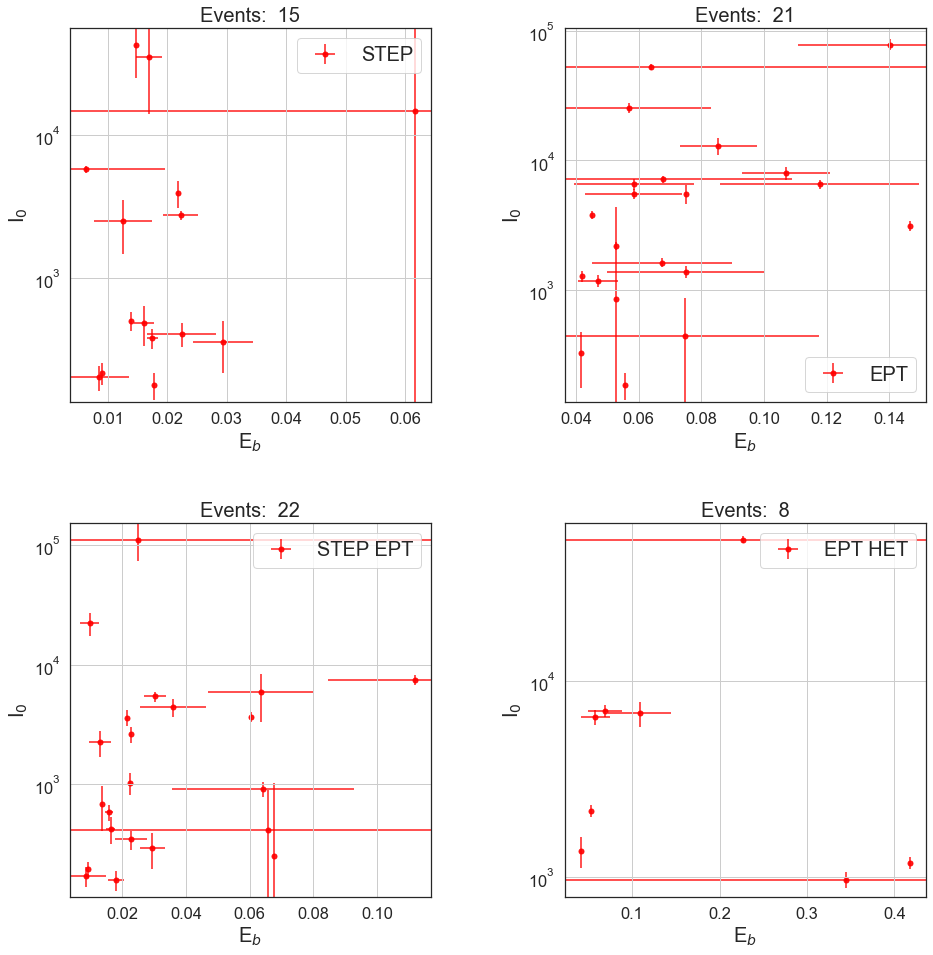

In [14]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)

xmaxlim = 0.75
xminlim = -7

ax[0,0].errorbar(y=step['c1'], x=step['break_point_mev'], yerr=step['c1_err'], xerr=step['break_point_err_mev'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[0,1].errorbar(y=ept['c1'], x=ept['break_point_mev'], yerr=ept['c1_err'], xerr=ept['break_point_err_mev'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(y=step_ept['c1'], x=step_ept['break_point_mev'], yerr=step_ept['c1_err'], xerr=step_ept['break_point_err_mev'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(y=ept_het['c1'], x=ept_het['break_point_mev'], yerr=ept_het['c1_err'], xerr=ept_het['break_point_err_mev'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('Events:  '+ n_step, size = s)
ax[0,1].set_title('Events:  '+ n_ept, size = s)
ax[1,0].set_title('Events:  '+ n_step_ept, size = s)
ax[1,1].set_title('Events:  '+ n_ept_het, size = s)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
#ax[0,0].set_xlim(0,xmaxlim)
#ax[0,0].set_xlim(xminlim, 0)
ax[0,0].set_ylabel(r'I$_0$', size=s)
ax[0,0].set_xlabel(r'E$_b$', size=s)


ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
#ax[0,1].set_xlim(0,xmaxlim)
#ax[0,1].set_ylim(yminlim, 0)
ax[0,1].set_ylabel(r'I$_0$', size=s)
ax[0,1].set_xlabel(r'E$_b$', size=s)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
#ax[1,0].set_xlim(0,xmaxlim)
#ax[1,0].set_xlim(xminlim, 0)
ax[1,0].set_ylabel(r'I$_0$', size=s)
ax[1,0].set_xlabel(r'E$_b$', size=s)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
#ax[1,1].set_xlim(0,xmaxlim)
#ax[1,1].set_xlim(xminlim, 0)
ax[1,1].set_ylabel(r'I$_0$', size=s)
ax[1,1].set_xlabel(r'E$_b$', size=s)

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

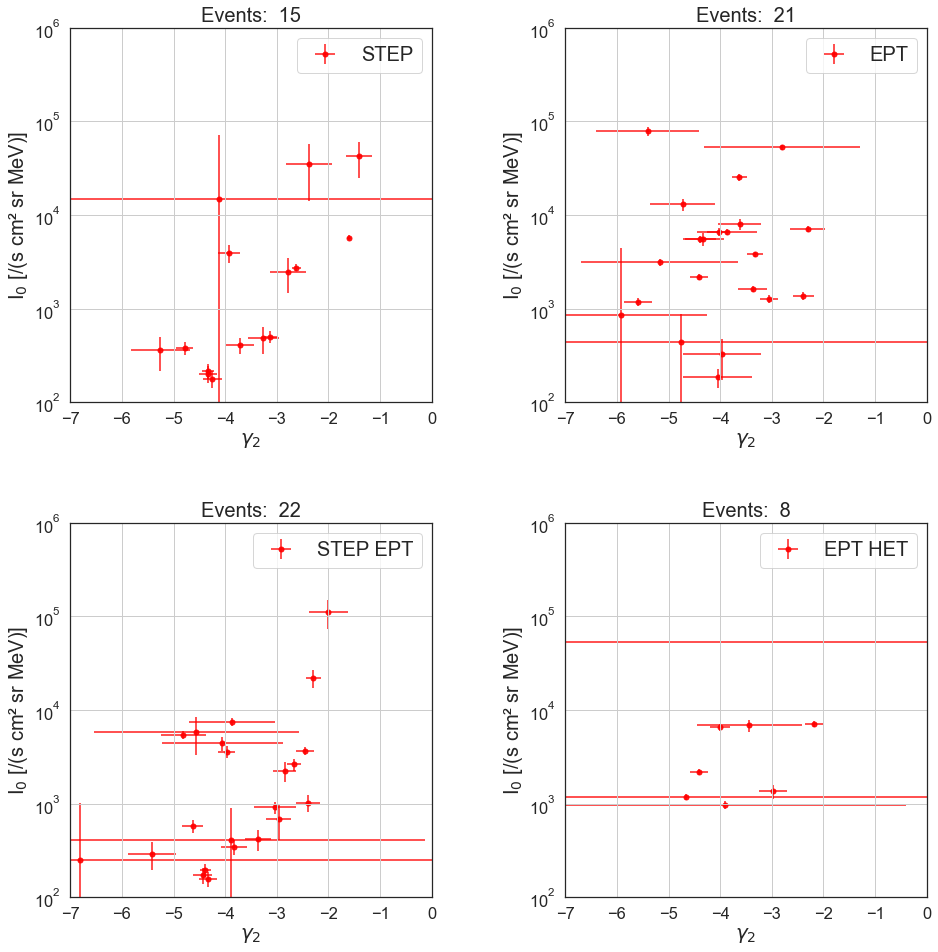

In [15]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
xmaxlim = 1000000
xminlim = -7
minv = 100

ax[0,0].errorbar(y=step['c1'], x=step['gamma2'], yerr=step['c1_err'], xerr=step['gamma2_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[0,1].errorbar(y=ept['c1'], x=ept['gamma2'], yerr=ept['c1_err'], xerr=ept['gamma2_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(y=step_ept['c1'], x=step_ept['gamma2'], yerr=step_ept['c1_err'], xerr=step_ept['gamma2_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(y=ept_het['c1'], x=ept_het['gamma2'], yerr=ept_het['c1_err'], xerr=ept_het['gamma2_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('Events:  '+ n_step, size = s)
ax[0,1].set_title('Events:  '+ n_ept, size = s)
ax[1,0].set_title('Events:  '+ n_step_ept, size = s)
ax[1,1].set_title('Events:  '+ n_ept_het, size = s)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_ylim(minv,xmaxlim)
ax[0,0].set_xlim(xminlim, 0)
ax[0,0].set_ylabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[0,0].set_xlabel(r'$\gamma_2$', size=s)


ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_ylim(minv,xmaxlim)
ax[0,1].set_xlim(xminlim, 0)
ax[0,1].set_ylabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[0,1].set_xlabel(r'$\gamma_2$', size=s)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_ylim(minv,xmaxlim)
ax[1,0].set_xlim(xminlim, 0)
ax[1,0].set_ylabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[1,0].set_xlabel(r'$\gamma_2$', size=s)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_ylim(minv,xmaxlim)
ax[1,1].set_xlim(xminlim, 0)
ax[1,1].set_ylabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[1,1].set_xlabel(r'$\gamma_2$', size=s)

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

In [16]:
n_step_ept_het = str(step_ept_het['c1'].count())
n_step_ept = str(step_ept['c1'].count())
n_ept_het = str(ept_het['c1'].count())
n_step = str(step['c1'].count())
n_ept = str(ept['c1'].count())

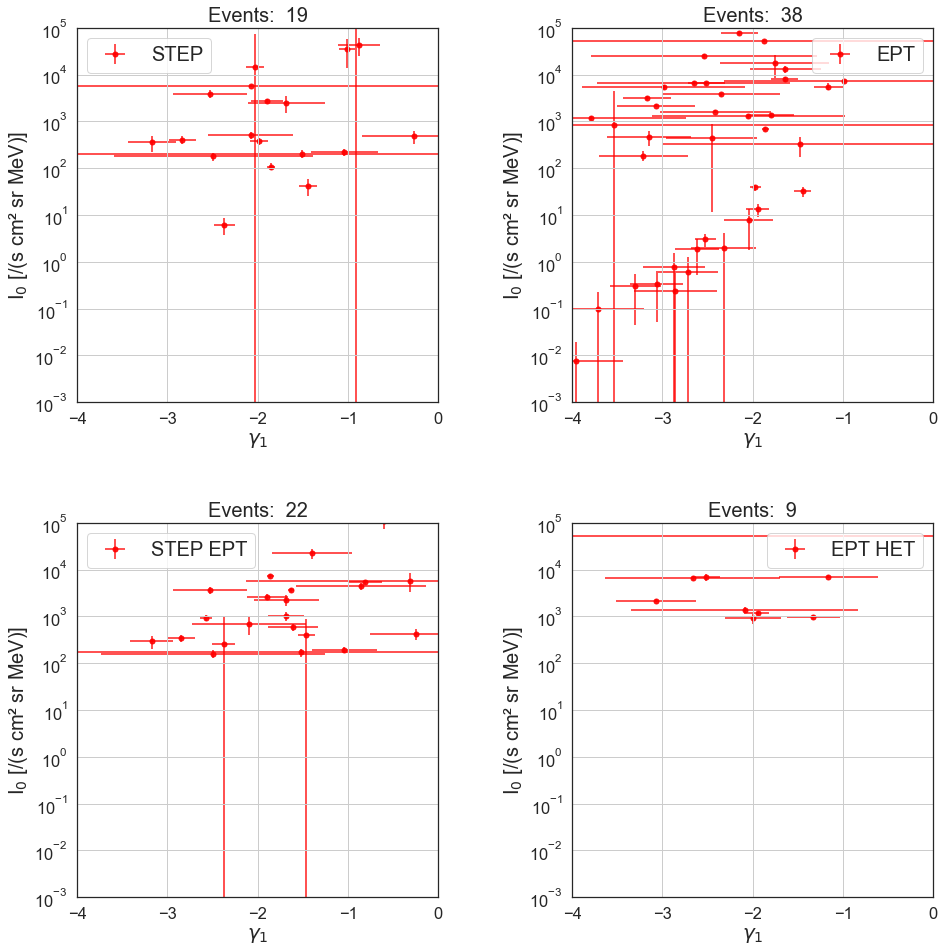

In [17]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
xmaxlim = 100000
xminlim = -4

ax[0,0].errorbar(y=step['c1'], x=step['gamma1'], yerr=step['c1_err'], xerr=step['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[0,1].errorbar(y=ept['c1'], x=ept['gamma1'], yerr=ept['c1_err'], xerr=ept['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(y=step_ept['c1'], x=step_ept['gamma1'], yerr=step_ept['c1_err'], xerr=step_ept['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(y=ept_het['c1'], x=ept_het['gamma1'], yerr=ept_het['c1_err'], xerr=ept_het['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('Events:  '+ n_step, size = s)
ax[0,1].set_title('Events:  '+ n_ept, size = s)
ax[1,0].set_title('Events:  '+ n_step_ept, size = s)
ax[1,1].set_title('Events:  '+ n_ept_het, size = s)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_ylim(0.001,xmaxlim)
ax[0,0].set_xlim(xminlim, 0)
ax[0,0].set_ylabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[0,0].set_xlabel(r'$\gamma_1$', size=s)


ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_ylim(0.001,xmaxlim)
ax[0,1].set_xlim(xminlim, 0)
ax[0,1].set_ylabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[0,1].set_xlabel(r'$\gamma_1$', size=s)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_ylim(0.001,xmaxlim)
ax[1,0].set_xlim(xminlim, 0)
ax[1,0].set_ylabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[1,0].set_xlabel(r'$\gamma_1$', size=s)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_ylim(0.001,xmaxlim)
ax[1,1].set_xlim(xminlim, 0)
ax[1,1].set_ylabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[1,1].set_xlabel(r'$\gamma_1$', size=s)

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

In [18]:
ept_b = []
step_b = []
ept_b_err = []
step_b_err = []


for i in range(len(ept)):
    for j in range(len(step)):
        if ept['day'][i] == step['day'][j] and ept['month'][i] == step['month'][j] and ept['year'][i] == step['year'][j] and ept['time'][i] == step['time'][j]:
            ept_b.append(ept['break_point_mev'][i])
            step_b.append(step['break_point_mev'][j])
            ept_b_err.append(ept['break_point_err_mev'][i])
            step_b_err.append(step['break_point_err_mev'][j])
            

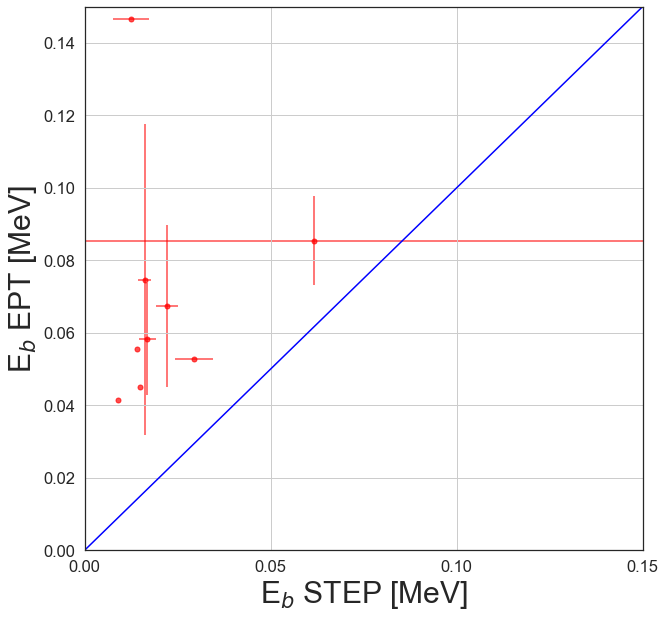

In [19]:
f, ax = plt.subplots(figsize=(10,10)) 
sns.set_theme(style="white",font_scale = 3)
s = 30

xmaxlim = 0.15
yminlim = -13

ax.errorbar(x=step_b, y=ept_b, xerr=step_b_err, yerr=ept_b_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.7)#, label = 'STEP')#, label='Flux average')

#ax.set_title('Events:  '+ n_step, size = s)
   
ax.plot(x,y, color = 'blue')

ax.grid()
#ax.legend(prop={'size': s})
ax.set_xlim(0,xmaxlim)
ax.set_ylim(0,xmaxlim)
ax.set_ylabel(r'E$_b$ EPT [MeV]', size=s)
ax.set_xlabel(r'E$_b$ STEP [MeV]', size=s)

plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

In [20]:
ept_b = []
step_ept_b = []
ept_b_err = []
step_ept_b_err = []


for i in range(len(ept)):
    for j in range(len(step)):
        if ept['day'][i] == step_ept['day'][j] and ept['month'][i] == step_ept['month'][j] and ept['year'][i] == step_ept['year'][j] and ept['time'][i] == step_ept['time'][j]:
            ept_b.append(ept['break_point_mev'][i])
            step_ept_b.append(step_ept['break_point_mev'][j])
            ept_b_err.append(ept['break_point_err_mev'][i])
            step_ept_b_err.append(step_ept['break_point_err_mev'][j])
            

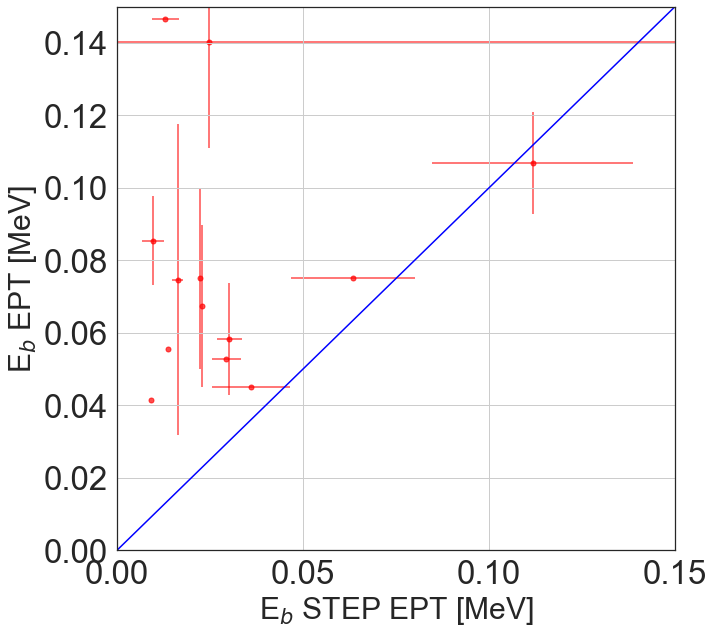

In [21]:
f, ax = plt.subplots(figsize=(10,10)) 
sns.set_theme(style="white",font_scale = 3)
s = 30
#f.tight_layout(pad=5.0)
xmaxlim = 0.15
yminlim = -13

ax.errorbar(x=step_ept_b, y=ept_b, xerr=step_ept_b_err, yerr=ept_b_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.7)#, label = 'STEP')#, label='Flux average')

#ax.set_title('Events:  '+ n_step, size = s)
   
ax.plot(x,y, color = 'blue')

ax.grid()
#ax.legend(prop={'size': s})
ax.set_xlim(0,xmaxlim)
ax.set_ylim(0,xmaxlim)
ax.set_ylabel(r'E$_b$ EPT [MeV]', size=s)
ax.set_xlabel(r'E$_b$ STEP EPT [MeV]', size=s)

plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

In [22]:
step_b = []
step_ept_b = []
step_b_err = []
step_ept_b_err = []


for i in range(len(step)):
    for j in range(len(step)):
        if step['day'][i] == step_ept['day'][j] and step['month'][i] == step_ept['month'][j] and step['year'][i] == step_ept['year'][j] and step['time'][i] == step_ept['time'][j]:
            step_b.append(step['break_point_mev'][i])
            step_ept_b.append(step_ept['break_point_mev'][j])
            step_b_err.append(step['break_point_err_mev'][i])
            step_ept_b_err.append(step_ept['break_point_err_mev'][j])


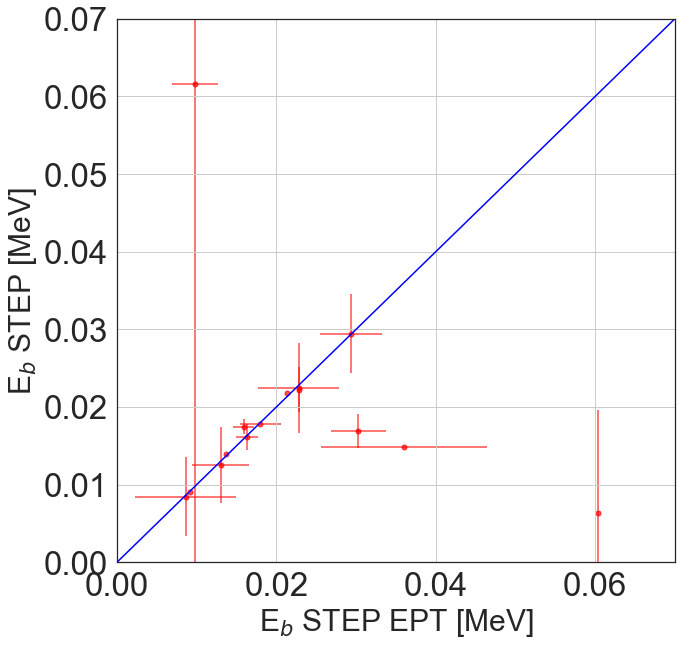

In [23]:
f, ax = plt.subplots(figsize=(10,10)) 
sns.set_theme(style="white",font_scale = 3)
s = 30
#f.tight_layout(pad=5.0)
xmaxlim = 0.07
yminlim = -13

ax.errorbar(x=step_ept_b, y=step_b, xerr=step_ept_b_err, yerr=step_b_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.7)#, label = 'STEP')#, label='Flux average')

#ax.set_title('Events:  '+ n_step, size = s)
   
ax.plot(x,y, color = 'blue')

ax.grid()
#ax.legend(prop={'size': s})
ax.set_xlim(0,xmaxlim)
ax.set_ylim(0,xmaxlim)
ax.set_ylabel(r'E$_b$ STEP [MeV]', size=s)
ax.set_xlabel(r'E$_b$ STEP EPT [MeV]', size=s)

plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

In [24]:
, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
xmaxlim = 0.75
xminlim = -4

ax[0,0].errorbar(y=step['c1'], x=step['gamma1'], yerr=step['c1_err'], xerr=step['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[0,1].errorbar(y=ept['c1'], x=ept['gamma1'], yerr=ept['c1_err'], xerr=ept['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(y=step_ept['c1'], x=step_ept['gamma1'], yerr=step_ept['c1_err'], xerr=step_ept['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(y=ept_het['c1'], x=ept_het['gamma1'], yerr=ept_het['c1_err'], xerr=ept_het['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('Events:  '+ n_step, size = s)
ax[0,1].set_title('Events:  '+ n_ept, size = s)
ax[1,0].set_title('Events:  '+ n_step_ept, size = s)
ax[1,1].set_title('Events:  '+ n_ept_het, size = s)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
#ax[0,0].set_xlim(0,xmaxlim)
ax[0,0].set_xlim(xminlim, 0)
ax[0,0].set_ylabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[0,0].set_xlabel(r'$\gamma_1$', size=s)


ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
#ax[0,1].set_xlim(0,xmaxlim)
ax[0,1].set_xlim(xminlim, 0)
ax[0,1].set_ylabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[0,1].set_xlabel(r'$\gamma_1$', size=s)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
#ax[1,0].set_xlim(0,xmaxlim)
ax[1,0].set_xlim(xminlim, 0)
ax[1,0].set_ylabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[1,0].set_xlabel(r'$\gamma_1$', size=s)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
#ax[1,1].set_xlim(0,xmaxlim)
ax[1,1].set_xlim(xminlim, 0)
ax[1,1].set_ylabel(r'I$_0$ [/(s cm² sr MeV)]', size=s)
ax[1,1].set_xlabel(r'$\gamma_1$', size=s)

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)
sns.set_theme(style="white",font_scale = 2)
s = 25

xmaxlim = 0.15
yminlim = -13

ax.errorbar(x=step_b, y=ept_b, xerr=step_b_err, yerr=ept_b_err, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.7)#, label = 'STEP')#, label='Flux average')

#ax.set_title('Events:  '+ n_step, size = s)
   
ax.plot(x,y, color = 'blue')

ax.grid()
#ax.legend(prop={'size': s})
ax.set_xlim(0,xmaxlim)
ax.set_ylim(0,xmaxlim)
ax.set_ylabel(r'E$_b$ EPT [MeV]', size=s)
ax.set_xlabel(r'E$_b$ STEP [MeV]', size=s)




plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

In [25]:
n_step_ept_het = str(step_ept_het['c1'].count())
n_step_ept = str(step_ept['c1'].count())
n_ept_het = str(ept_het['c1'].count())
n_step = str(step['c1'].count())
n_ept = str(ept['c1'].count())

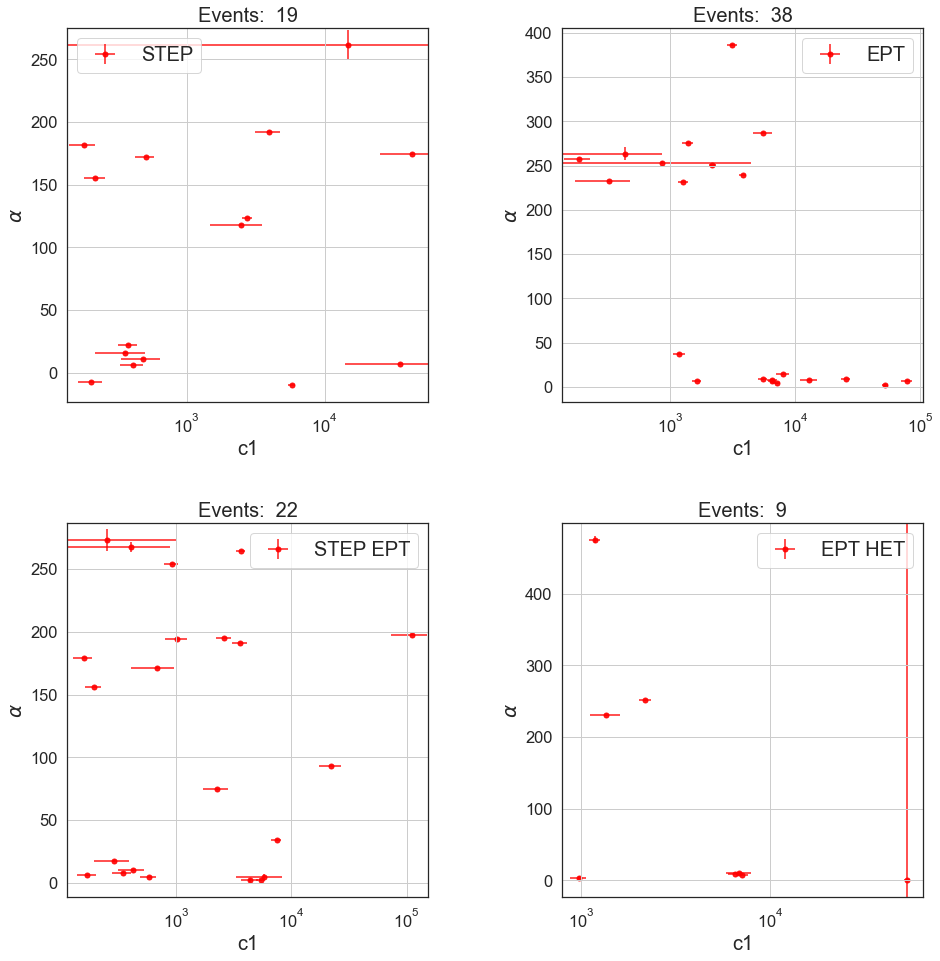

In [26]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
xmaxlim = 0.75
xminlim = -7

ax[0,0].errorbar(y=step['alpha'], x=step['c1'], yerr=step['gamma2_err'], xerr=step['c1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[0,1].errorbar(y=ept['alpha'], x=ept['c1'], yerr=ept['gamma2_err'], xerr=ept['c1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(y=step_ept['alpha'], x=step_ept['c1'], yerr=step_ept['gamma2_err'], xerr=step_ept['c1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(y=ept_het['alpha'], x=ept_het['c1'], yerr=ept_het['gamma2_err'], xerr=ept_het['c1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('Events:  '+ n_step, size = s)
ax[0,1].set_title('Events:  '+ n_ept, size = s)
ax[1,0].set_title('Events:  '+ n_step_ept, size = s)
ax[1,1].set_title('Events:  '+ n_ept_het, size = s)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
#ax[0,0].set_xlim(0,xmaxlim)
#ax[0,0].set_xlim(xminlim, 0)
ax[0,0].set_ylabel(r'$\alpha$', size=s)
ax[0,0].set_xlabel(r'c1', size=s)


ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
#ax[0,1].set_xlim(0,xmaxlim)
#ax[0,1].set_ylim(yminlim, 0)
ax[0,1].set_ylabel(r'$\alpha$', size=s)
ax[0,1].set_xlabel(r'c1', size=s)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
#ax[1,0].set_xlim(0,xmaxlim)
#ax[1,0].set_xlim(xminlim, 0)
ax[1,0].set_ylabel(r'$\alpha$', size=s)
ax[1,0].set_xlabel(r'c1', size=s)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
#ax[1,1].set_xlim(0,0.75)
#ax[1,1].set_xlim(xminlim, 0)
ax[1,1].set_ylabel(r'$\alpha$', size=s)
ax[1,1].set_xlabel(r'c1', size=s)

ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')

plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

In [27]:
alp = []
gamma_diff = []
for i in range(len(ept.gamma1)):
    alp.append(ept.alpha[i])
    gamma_diff.append(ept.gamma1[i]-ept.gamma2[i])

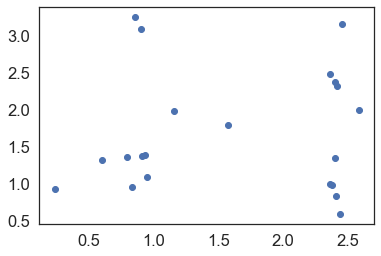

In [28]:
plt.scatter(np.log10(alp), gamma_diff)


In [29]:
# calculate intensity at break energy
ept_break_int = []
ept_break_int_err = []

for i in range(len(ept)):
    intensity_ept = ept.c1[i]*(ept.break_point_mev[i]/0.1)**ept.gamma1[i] *((ept.break_point_mev[i]**ept.alpha[i]*2)/(0.1**ept.alpha[i]+ept.break_point_mev[i]**ept.alpha[i]))**((ept.gamma2[i]-ept.gamma1[i])/ept.alpha[i])
    ept_break_int.append(intensity_ept)
    intensity_err_ept = ept.c1_err[i]*(ept.break_point_err_mev[i]/0.1)**ept.gamma1_err[i] *((ept.break_point_err_mev[i]**ept.alpha[i]*2)/(0.1**ept.alpha[i]+ept.break_point_err_mev[i]**ept.alpha[i]))**((ept.gamma2_err[i]-ept.gamma1_err[i])/ept.alpha[i])
    ept_break_int_err.append(intensity_err_ept)

    
ept_het_break_int = []
ept_het_break_int_err = []

for i in range(len(ept_het)):
    intensity_ept_het = ept_het.c1[i]*(ept_het.break_point_mev[i]/0.1)**ept_het.gamma1[i] *((ept_het.break_point_mev[i]**ept_het.alpha[i]*2)/(0.1**ept_het.alpha[i]+ept_het.break_point_mev[i]**ept_het.alpha[i]))**((ept_het.gamma2[i]-ept_het.gamma1[i])/ept_het.alpha[i])
    ept_het_break_int.append(intensity_ept_het)
    intensity_err_ept_het = ept_het.c1_err[i]*(ept_het.break_point_err_mev[i]/0.1)**ept_het.gamma1_err[i] *((ept_het.break_point_err_mev[i]**ept_het.alpha[i]*2)/(0.1**ept_het.alpha[i]+ept_het.break_point_err_mev[i]**ept_het.alpha[i]))**((ept_het.gamma2_err[i]-ept_het.gamma1_err[i])/ept_het.alpha[i])
    ept_het_break_int_err.append(intensity_err_ept_het)

step_ept_break_int = []
step_ept_break_int_err = []

for i in range(len(step_ept)):
    intensity_step_ept = step_ept.c1[i]*(step_ept.break_point_mev[i]/0.1)**step_ept.gamma1[i] *((step_ept.break_point_mev[i]**step_ept.alpha[i]*2)/(0.1**step_ept.alpha[i]+step_ept.break_point_mev[i]**step_ept.alpha[i]))**((step_ept.gamma2[i]-step_ept.gamma1[i])/step_ept.alpha[i])
    step_ept_break_int.append(intensity_step_ept)
    intensity_err_step_ept = step_ept.c1_err[i]*(step_ept.break_point_err_mev[i]/0.1)**step_ept.gamma1_err[i] *((step_ept.break_point_err_mev[i]**step_ept.alpha[i]*2)/(0.1**ept.alpha[i]+ept.break_point_err_mev[i]**step_ept.alpha[i]))**((step_ept.gamma2_err[i]-step_ept.gamma1_err[i])/step_ept.alpha[i])
    step_ept_break_int_err.append(intensity_err_step_ept)

    
step_break_int = []
step_break_int_err = []

for i in range(len(step)):
    intensity_step = step.c1[i]*(step.break_point_mev[i]/0.1)**step.gamma1[i] *((step.break_point_mev[i]**step.alpha[i]*2)/(0.1**step.alpha[i]+step.break_point_mev[i]**step.alpha[i]))**((step.gamma2[i]-step.gamma1[i])/step.alpha[i])
    step_break_int.append(intensity_step)
    intensity_err_step = step.c1_err[i]*(step.break_point_err_mev[i]/0.1)**step.gamma1_err[i] *((step.break_point_err_mev[i]**step.alpha[i]*2)/(0.1**step.alpha[i]+step.break_point_err_mev[i]**step.alpha[i]))**((step.gamma2_err[i]-step.gamma1_err[i])/step.alpha[i])
    step_break_int_err.append(intensity_err_step)


C:\Users\Omistaja\AppData\Local\Temp\ipykernel_5524\1527925462.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  intensity_err_ept = ept.c1_err[i]*(ept.break_point_err_mev[i]/0.1)**ept.gamma1_err[i] *((ept.break_point_err_mev[i]**ept.alpha[i]*2)/(0.1**ept.alpha[i]+ept.break_point_err_mev[i]**ept.alpha[i]))**((ept.gamma2_err[i]-ept.gamma1_err[i])/ept.alpha[i])
C:\Users\Omistaja\AppData\Local\Temp\ipykernel_5524\1527925462.py:8: RuntimeWarning: invalid value encountered in double_scalars
  intensity_err_ept = ept.c1_err[i]*(ept.break_point_err_mev[i]/0.1)**ept.gamma1_err[i] *((ept.break_point_err_mev[i]**ept.alpha[i]*2)/(0.1**ept.alpha[i]+ept.break_point_err_mev[i]**ept.alpha[i]))**((ept.gamma2_err[i]-ept.gamma1_err[i])/ept.alpha[i])
C:\Users\Omistaja\AppData\Local\Temp\ipykernel_5524\1527925462.py:18: RuntimeWarning: overflow encountered in double_scalars
  intensity_err_ept_het = ept_het.c1_err[i]*(ept_het.break_point_err_mev[i]/0.1)**ept_het.gamma1_err[i] *((ept_het

In [30]:
step_int = []
step_bre = []
step_int_err = []
step_bre_err = []
for i in range(len(step)):
    if np.isnan(step_break_int[i]) and np.isnan(step['break_point_mev'][i]):
        a = 10
    else:
        step_int.append(step_break_int[i])
        step_bre.append(step['break_point_mev'][i])
        step_bre_err.append(step['break_point_err_mev'][i])
        if np.isnan(step_break_int_err[i]) or math.isinf(step_break_int_err[i]):
            step_int_err.append(step_break_int[i]*0.1)
        else:
            step_int_err.append(step_break_int_err[i])
            
        
        
step_ept_int = []
step_ept_bre = []
step_ept_int_err = []
step_ept_bre_err = []

for i in range(len(step_ept)):
    if np.isnan(step_ept_break_int[i]) and np.isnan(step_ept['break_point_mev'][i]):
        a = 10
    else:
        step_ept_int.append(step_ept_break_int[i])
        step_ept_bre.append(step_ept['break_point_mev'][i])
        step_ept_bre_err.append(step_ept['break_point_err_mev'][i])
        if np.isnan(step_ept_break_int_err[i]) or math.isinf(step_ept_break_int_err[i]):
            step_ept_int_err.append(step_ept_break_int[i]*0.1)
        else:
            step_ept_int_err.append(step_ept_break_int_err[i])
            
        
ept_int = []
ept_bre = []        
ept_int_err = []
ept_bre_err = []
for i in range(len(ept)):
    if np.isnan(ept_break_int[i]) and np.isnan(ept['break_point_mev'][i]):
        a = 10
    else:
        ept_int.append(ept_break_int[i])
        ept_bre.append(ept['break_point_mev'][i])
        ept_bre_err.append(ept['break_point_err_mev'][i])
        if np.isnan(ept_break_int_err[i]) or math.isinf(ept_break_int_err[i]):
            ept_int_err.append(ept_break_int[i]*0.1)
        else:
            ept_int_err.append(ept_break_int_err[i])
        
ept_het_int = []
ept_het_bre = []
ept_het_int_err = []
ept_het_bre_err = []
for i in range(len(ept_het)):
    if np.isnan(ept_het_break_int[i]) and np.isnan(ept_het['break_point_mev'][i]):
        a = 10
    else:
        ept_het_int.append(log(ept_het_break_int[i]))
        ept_het_bre.append(ept_het['break_point_mev'][i])
        ept_het_bre_err.append(ept_het['break_point_err_mev'][i])
        if np.isnan(ept_het_break_int_err[i]) or math.isinf(ept_het_break_int_err[i]):
            ept_het_int_err.append(ept_het_break_int[i]*0.1)
        else:
            ept_het_int_err.append(ept_het_break_int_err[i])

In [31]:
ept_int_err

[3693.8592006133194,
 1045.7673596767293,
 0.0,
 437.6790529052837,
 0.0,
 93.29892152957385,
 540.2645612180908,
 82.28319635502561,
 0.0,
 2440.289528343015,
 262.08367596749827,
 5360.568441108742,
 274.05170332679285,
 1702.285768864807,
 693168.1019571961,
 3684.9968966461056,
 1822.9800412878137,
 412.35874849974186,
 291.7086812903778,
 57.19153589068917,
 269.74610794524534]

In [44]:
# corr_coeff_monte_carlo.py

'''Sep 2022: make a function to correlate a 
correlation coefficient that takes into 
account the measurement uncertainties

use a monte-carlo approach: calcualte the 
corr coeff n times using random values within the uncertainty range
'''
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr
#%matplotlib inline
plt.style.use('ggplot')

# generate data to test:
N = 50
mean_height = 5.5 #Let's say the average height is 5.5 feet
sigma_height = 0.5 #Standard deviation of 0.5 feet
x = np.random.normal(mean_height,sigma_height, N)
R = 20 #Scaling factor between weight in lbs and height in feet
y = R * x
y = y + np.random.normal(0,10,N) #Let's add some scatter
x_err = np.abs(np.random.normal(0.2, 0.1, 50))
y_err = np.abs(np.random.normal(0.2, 0.1, 50))




def monte_carlo_corr_coeff(x, y, x_err=None, y_err=None, n=10000, plot_data=False, plot_stats=False, corr_type='spearman'):
    if plot_data:
        plt.figure()
        plt.errorbar(x, y, xerr=x_err, yerr=y_err, marker='o',ms=5,capsize=1,linestyle='')
        plt.show()

    rho_sim = np.zeros(n) #Initialize array of Spearman correlation coefficients
    p_sim = np.zeros(n) #Initialize array of p-values

    for i in range(n):
        #Generate random values using mean x and y with measurement error x_err and y_err
        if x_err is None:
            x_sim = x   
        else:
            x_sim = np.random.normal(x,x_err)
        if y_err is None:
            y_sim = y
        else:
            y_sim = np.random.normal(y,y_err)
        
        #Calculate correlation coefficient and p-value
        if corr_type.lower() == 'spearman':
            rho_sim[i],p_sim[i] = spearmanr(x_sim,y_sim)
        if corr_type.lower() == 'pearson':
            rho_sim[i],p_sim[i] = pearsonr(x_sim,y_sim)

    print(f'{corr_type} correlation coefficient is ' + str(np.mean(rho_sim)) + ' +/- ' \
        + str(np.std(rho_sim)))

    if plot_stats:
        #Plot results
        plt.figure()
        plt.hist(rho_sim,density=True)
        plt.xlabel('Spearman correlation coefficient')
        plt.ylabel('probability')
        plt.xlim((-1,1))

        plt.figure()
        plt.hist(p_sim,density=True)
        plt.xlabel('p-value')
        plt.ylabel('probability')
        #plt.xlim((0,0.1))
        plt.show()
    return(np.mean(rho_sim), np.std(rho_sim))




In [45]:
coef_step, p_step = spearmanr(step_int, step_bre)
coef_ept, p_ept = spearmanr(ept_int, ept_bre)
coef_step_ept, p_step_ept = spearmanr(step_ept_int, step_ept_bre)
coef_ept_het, p_ept_het = spearmanr(ept_het_int, ept_het_bre)

In [46]:
print(coef_step)
print(coef_ept)
print(coef_step_ept)
print(coef_ept_het)

-0.3928571428571428
-0.44415584415584414
-0.8452851496329757
-0.8333333333333335


In [47]:
coef_step, err_step = monte_carlo_corr_coeff(step_bre, step_int, x_err=step_bre_err, y_err=step_int_err, n=10000, plot_data=False, plot_stats=False, corr_type='spearman')
coef_ept, err_ept = monte_carlo_corr_coeff(ept_bre, ept_int, x_err=ept_bre_err, y_err=ept_int_err, n=10000, plot_data=False, plot_stats=False, corr_type='spearman')
coef_step_ept, err_step_ept = monte_carlo_corr_coeff(step_ept_bre, step_ept_int, x_err=step_ept_bre_err, y_err=step_ept_int_err, n=10000, plot_data=False, plot_stats=False, corr_type='spearman')
coef_ept_het, err_ept_het = monte_carlo_corr_coeff(ept_het_bre, ept_het_int, x_err=ept_het_bre_err, y_err=ept_het_int_err, n=10000, plot_data=False, plot_stats=False, corr_type='spearman')

spearman correlation coefficient is -0.22931499999999996 +/- 0.18216628885556227
spearman correlation coefficient is -0.32225129870129865 +/- 0.18236756644996513
spearman correlation coefficient is -0.6630709203839641 +/- 0.15130720819002988
spearman correlation coefficient is 0.01627857142857143 +/- 0.3429710907787672


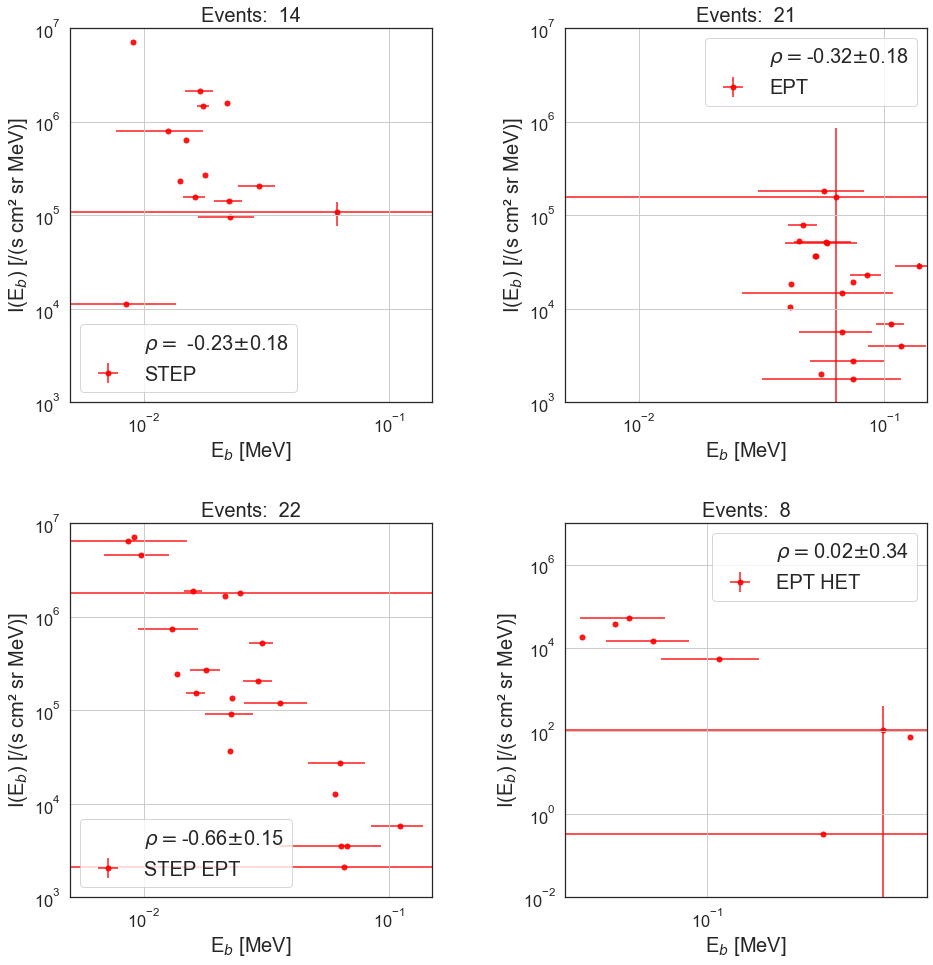

In [57]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
xmaxlim = 0.15
yminlim = 1000
ymaxlim = 10000000

ax[0,0].errorbar(y=step_break_int, x=step['break_point_mev'], yerr=step_break_int_err, xerr=step['break_point_err_mev'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[0,1].errorbar(y=ept_break_int, x=ept['break_point_mev'], yerr=ept_break_int_err, xerr=ept['break_point_err_mev'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(y=step_ept_break_int, x=step_ept['break_point_mev'], yerr=step_ept_break_int_err, xerr=step_ept['break_point_err_mev'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(y=ept_het_break_int, x=ept_het['break_point_mev'], yerr=ept_het_break_int_err, xerr=ept_het['break_point_err_mev'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('Events:  '+ n_step, size = s)
ax[0,1].set_title('Events:  '+ n_ept, size = s)
ax[1,0].set_title('Events:  '+ n_step_ept, size = s)
ax[1,1].set_title('Events:  '+ n_ept_het, size = s)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')

ax[0,0].plot([], [], ' ', label=r"$\rho = $ "+ str(round(coef_step,2))+'$\pm$'+str(round(err_step,2)))
ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_xlim(0.005,xmaxlim)
ax[0,0].set_ylim(yminlim, ymaxlim)
ax[0,0].set_ylabel(r'I(E$_b$) [/(s cm² sr MeV)]', size=s)
ax[0,0].set_xlabel(r'E$_b$ [MeV]', size=s)

ax[0,1].plot([], [], ' ', label=r"$\rho  = $"+ str(round(coef_ept,2))+'$\pm$'+str(round(err_ept,2)))

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_xlim(0.005,xmaxlim)
ax[0,1].set_ylim(yminlim, ymaxlim)
ax[0,1].set_ylabel(r'I(E$_b$) [/(s cm² sr MeV)]', size=s)
ax[0,1].set_xlabel(r'E$_b$ [MeV]', size=s)

ax[1,0].plot([], [], ' ', label=r"$\rho  = $"+ str(round(coef_step_ept,2))+'$\pm$'+str(round(err_step_ept,2)))

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_xlim(0.005,xmaxlim)
ax[1,0].set_ylim(yminlim, ymaxlim)
ax[1,0].set_ylabel(r'I(E$_b$) [/(s cm² sr MeV)]', size=s)
ax[1,0].set_xlabel(r'E$_b$ [MeV]', size=s)

ax[1,1].plot([], [], ' ', label=r"$\rho  = $"+ str(round(coef_ept_het,2))+'$\pm$'+str(round(err_ept_het,2)))

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
#ax[1,1].set_xlim(0.005,0.5)
#ax[1,1].set_ylim(yminlim, ymaxlim)
ax[1,1].set_ylim(0.01, ymaxlim)

ax[1,1].set_ylabel(r'I(E$_b$) [/(s cm² sr MeV)]', size=s)
ax[1,1].set_xlabel(r'E$_b$ [MeV]', size=s)


ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')

#plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

In [55]:
broken_ept = ept.where((ept.final_fit_type == 'broken'), np.nan)

In [ ]:
broken_ept.count()

In [33]:
step_g1 = []
step_g2 = []
step_g1_err = []
step_g2_err = []
for i in range(len(step)):
    if np.isnan(step['gamma1'][i]) or np.isnan(step['gamma2'][i]):
        a = 10
    else:
        step_g1.append(step['gamma1'][i])
        step_g2.append(step['gamma2'][i])
        step_g1_err.append(step['gamma1_err'][i])
        step_g2_err.append(step['gamma2_err'][i])
        
step_ept_g1 = []
step_ept_g2 = []
step_ept_g1_err = []
step_ept_g2_err = []
for i in range(len(step_ept)):
    if np.isnan(step_ept['gamma1'][i]) or np.isnan(step_ept['gamma2'][i]):
        a = 10
    else:
        step_ept_g1.append(step_ept['gamma1'][i])
        step_ept_g2.append(step_ept['gamma2'][i])
        step_ept_g1_err.append(step_ept['gamma1_err'][i])
        step_ept_g2_err.append(step_ept['gamma2_err'][i])
        
ept_g1 = []
ept_g2 = []
ept_g1_err = []
ept_g2_err = []
for i in range(len(ept)):
    if np.isnan(ept['gamma1'][i]) or np.isnan(ept['gamma2'][i]):
        a = 10
    else:
        ept_g1.append(ept['gamma1'][i])
        ept_g2.append(ept['gamma2'][i])
        ept_g1_err.append(ept['gamma1_err'][i])
        ept_g2_err.append(ept['gamma2_err'][i])
        
ept_het_g1 = []
ept_het_g2 = []
ept_het_g1_err = []
ept_het_g2_err = []
for i in range(len(ept_het)):
    if np.isnan(ept_het['gamma1'][i]) or np.isnan(ept_het['gamma2'][i]):
        a = 10
    else:
        ept_het_g1.append(ept_het['gamma1'][i])
        ept_het_g2.append(ept_het['gamma2'][i])
        ept_het_g1_err.append(ept_het['gamma1_err'][i])
        ept_het_g2_err.append(ept_het['gamma2_err'][i])

In [34]:
coef_step_g, err_step_g = monte_carlo_corr_coeff(step_g1, step_g2, x_err=step_g1_err, y_err=step_g2_err, n=10000, plot_data=False, plot_stats=False, corr_type='spearman')
coef_ept_g, err_ept_g = monte_carlo_corr_coeff(ept_g1, ept_g2, x_err=ept_g1_err, y_err=ept_g2_err, n=10000, plot_data=False, plot_stats=False, corr_type='spearman')
coef_step_ept_g, err_step_ept_g = monte_carlo_corr_coeff(step_ept_g1, step_ept_g2, x_err=step_ept_g1_err, y_err=step_ept_g2_err, n=10000, plot_data=False, plot_stats=False, corr_type='spearman')
coef_ept_het_g, err_ept_het_g = monte_carlo_corr_coeff(ept_het_g1, ept_het_g2, x_err=ept_het_g1_err, y_err=ept_het_g2_err, n=10000, plot_data=False, plot_stats=False, corr_type='spearman')

spearman correlation coefficient is 0.3132917857142857 +/- 0.18499096948140026
spearman correlation coefficient is 0.23006740259740258 +/- 0.19030933898247532
spearman correlation coefficient is 0.1015560700169396 +/- 0.1506765082589168
spearman correlation coefficient is 0.21945714285714288 +/- 0.3879554409039576


In [ ]:
monte_carlo_corr_coeff(ept_g1, ept_g2, x_err=ept_g1_err, y_err=ept_g2_err, n=10000, plot_data=False, plot_stats=False, corr_type='spearman')

In [ ]:
coef_step_g, p_step_g = spearmanr(step_g1, step_g2)
coef_ept_g, p_ept_g = spearmanr(ept_g1, ept_g2)
coef_step_ept_g, p_step_ept_g = spearmanr(step_ept_g1, step_ept_g2)
coef_ept_het_g, p_ept_het_g = spearmanr(ept_het_g1, ept_het_g2)
print(coef_step_g)
print(coef_ept_g)
print(coef_step_ept_g)
print(coef_ept_het_g)

C:\Users\Omistaja\Anaconda3\envs\annamaria\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Omistaja\Anaconda3\envs\annamaria\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


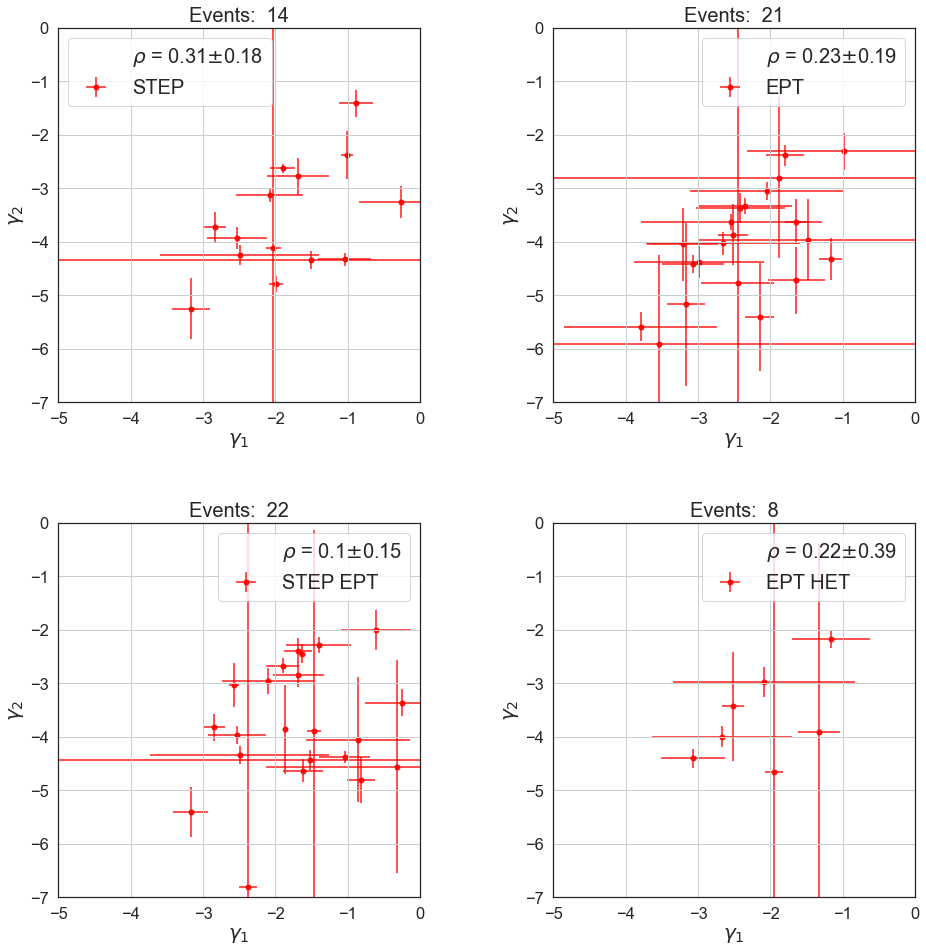

In [42]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
xmaxlim = -5
xminlim = -7

ax[0,0].errorbar(y=step['gamma2'], x=step['gamma1'], yerr=step['gamma2_err'], xerr=step['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP')#, label='Flux average')
ax[0,1].errorbar(y=ept['gamma2'], x=ept['gamma1'], yerr=ept['gamma2_err'], xerr=ept['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(y=step_ept['gamma2'], x=step_ept['gamma1'], yerr=step_ept['gamma2_err'], xerr=step_ept['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(y=ept_het['gamma2'], x=ept_het['gamma1'], yerr=ept_het['gamma2_err'], xerr=ept_het['gamma1_err'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('Events:  '+ n_step, size = s)
ax[0,1].set_title('Events:  '+ n_ept, size = s)
ax[1,0].set_title('Events:  '+ n_step_ept, size = s)
ax[1,1].set_title('Events:  '+ n_ept_het, size = s)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')

ax[0,0].plot([], [], ' ', label = r"$\rho$ = "+ str(round(coef_step_g,2))+'$\pm$'+str(round(err_step_g,2)))
ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_xlim(xmaxlim, 0)
ax[0,0].set_ylim(xminlim, 0)
ax[0,0].set_ylabel(r'$\gamma_2$', size=s)
ax[0,0].set_xlabel(r'$\gamma_1$', size=s)

ax[0,1].plot([], [], ' ', label = r"$\rho$ = "+ str(round(coef_ept_g,2))+'$\pm$'+str(round(err_ept_g,2)))

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_xlim(xmaxlim, 0)
ax[0,1].set_ylim(xminlim, 0)
ax[0,1].set_ylabel(r'$\gamma_2$', size=s)
ax[0,1].set_xlabel(r'$\gamma_1$', size=s)

ax[1,0].plot([], [], ' ', label = r"$\rho$ = "+ str(round(coef_step_ept_g,2))+'$\pm$'+str(round(err_step_ept_g,2)))

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_xlim(xmaxlim, 0)
ax[1,0].set_ylim(xminlim, 0)
ax[1,0].set_ylabel(r'$\gamma_2$', size=s)
ax[1,0].set_xlabel(r'$\gamma_1$', size=s)

ax[1,1].plot([], [], ' ', label = r"$\rho$ = "+ str(round(coef_ept_het_g,2))+'$\pm$'+str(round(err_ept_het_g,2)))

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_xlim(xmaxlim, 0)
ax[1,1].set_ylim(xminlim, 0)
ax[1,1].set_ylabel(r'$\gamma_2$', size=s)
ax[1,1].set_xlabel(r'$\gamma_1$', size=s)


plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()